In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/kaggle/input/myntra-fashion-dataset/Myntra Fasion Clothing.csv')

/tmp/ipykernel_33/3316259858.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/myntra-fashion-dataset/Myntra Fasion Clothing.csv')


In [8]:
df.head(1)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0


In [9]:
df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [10]:
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].mean())
df['DiscountOffer'] = df['Reviews'].fillna(df['Reviews'].mean())
df.drop('DiscountPrice (in Rs)', axis = 1 , inplace = True)

In [11]:
df.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'OriginalPrice (in Rs)',
       'DiscountOffer', 'SizeOption', 'Ratings', 'Reviews'],
      dtype='object')

In [12]:
df['BrandName'].value_counts()

BrandName
Pothys                   16005
Roadster                 10935
KALINI                    9589
HERE&NOW                  6515
HRX by Hrithik Roshan     5297
                         ...  
PIVOTO                       1
PEONY SMART WORLD            1
OFFIRA TEX WORLD             1
Sztori Garfield              1
Geonaute By Decathlon        1
Name: count, Length: 2088, dtype: int64

In [13]:
df['Category'].value_counts()

Category
Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: count, dtype: int64

In [14]:
df['Individual_category'].value_counts()

Individual_category
tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
jewellery-set         2
hair-accessory        1
lungi                 1
bracelet              1
flip-flops            1
Name: count, Length: 92, dtype: int64

In [15]:
df['Individual_category'].unique()

array(['jeans', 'track-pants', 'shirts', 'shapewear', 'tshirts', 'tops',
       'trousers', 'tights', 'kurta-sets', 'jumpsuit', 'kurtas', 'bra',
       'shorts', 'dresses', 'bath-robe', 'jackets', 'socks', 'briefs',
       'sweatshirts', 'sarees', 'trunk', 'kurtis', 'skirts',
       'night-suits', 'lounge-pants', 'palazzos', 'stockings', 'jeggings',
       'leggings', 'shrug', 'boxers', 'dupatta', 'tunics',
       'innerwear-vests', 'sweaters', 'lounge-shorts', 'thermal-tops',
       'capris', 'nightdress', 'pyjamas', 'sports-sandals', 'dungarees',
       'tracksuits', 'camisoles', 'nehru-jackets', 'blazers',
       'thermal-bottoms', 'lounge-tshirts', 'lehenga-choli', 'baby-dolls',
       'coats', 'thermal-set', 'saree-blouse', 'churidar',
       'dress-material', 'boots', 'lingerie-set', 'sherwani', 'co-ords',
       'flats', 'swimwear', 'rain-jacket', 'patiala', 'salwar',
       'harem-pants', 'patiala-and-dupatta', 'lingerie-accessories',
       'saree-accessories', 'suits', 'dhoti

In [16]:
df['category_by_Gender'].value_counts()

category_by_Gender
Women    339185
Men      187379
Name: count, dtype: int64

In [17]:
df['DiscountOffer'].value_counts()

DiscountOffer
61.99082     336152
5.00000       12173
6.00000        9876
7.00000        8326
8.00000        7346
              ...  
960.00000         1
992.00000         1
994.00000         1
821.00000         1
997.00000         1
Name: count, Length: 1001, dtype: int64

<Axes: xlabel='Ratings'>

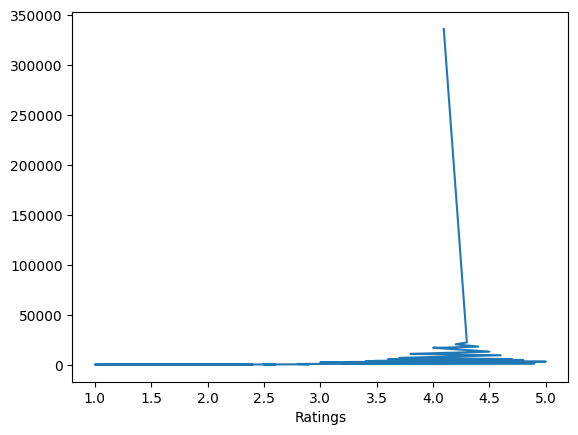

In [18]:
df['Ratings'].value_counts().plot()

<Axes: xlabel='Reviews'>

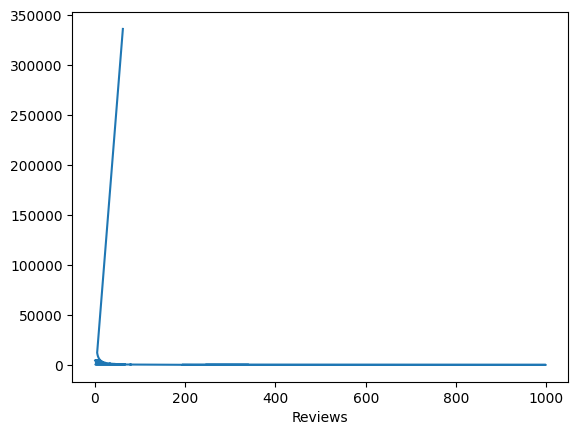

In [19]:
df['Reviews'].value_counts().plot()

<Axes: ylabel='BrandName'>

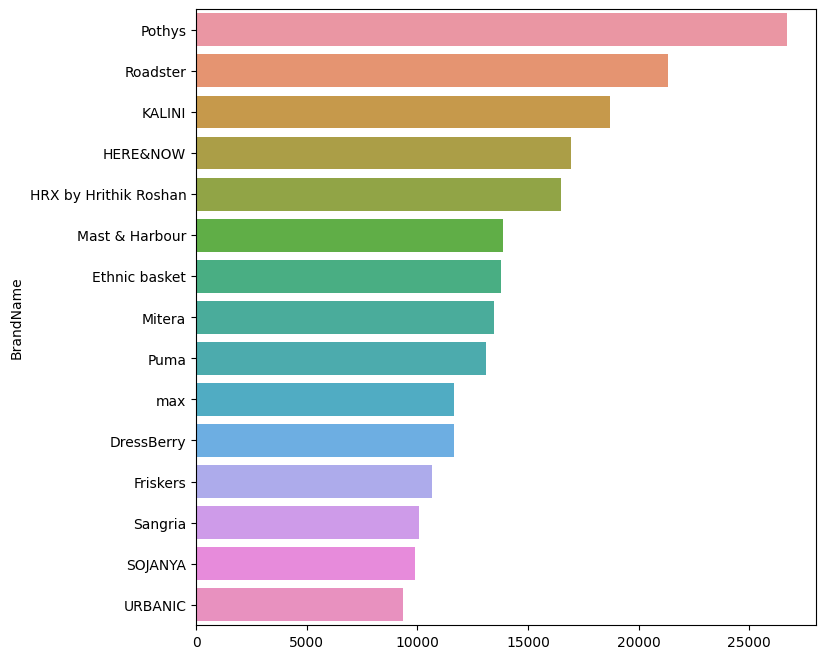

In [20]:
# Top 10 Brand on price based
plt.figure(figsize = (8,8))
sns.barplot(x = df['OriginalPrice (in Rs)'].value_counts().head(15).values, y=df['BrandName'].value_counts().head(15).index)

<Axes: ylabel='BrandName'>

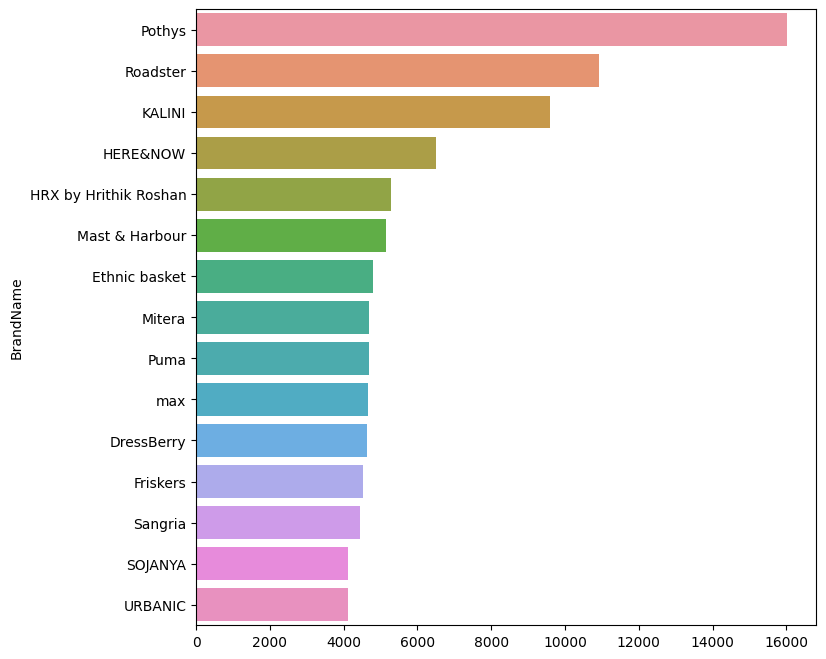

In [21]:
# Top 15 brand 
plt.figure(figsize = (8,8))

sns.barplot(x = df['BrandName'].value_counts().head(15).values, y=df['BrandName'].value_counts().head(15).index)

<Axes: ylabel='Category'>

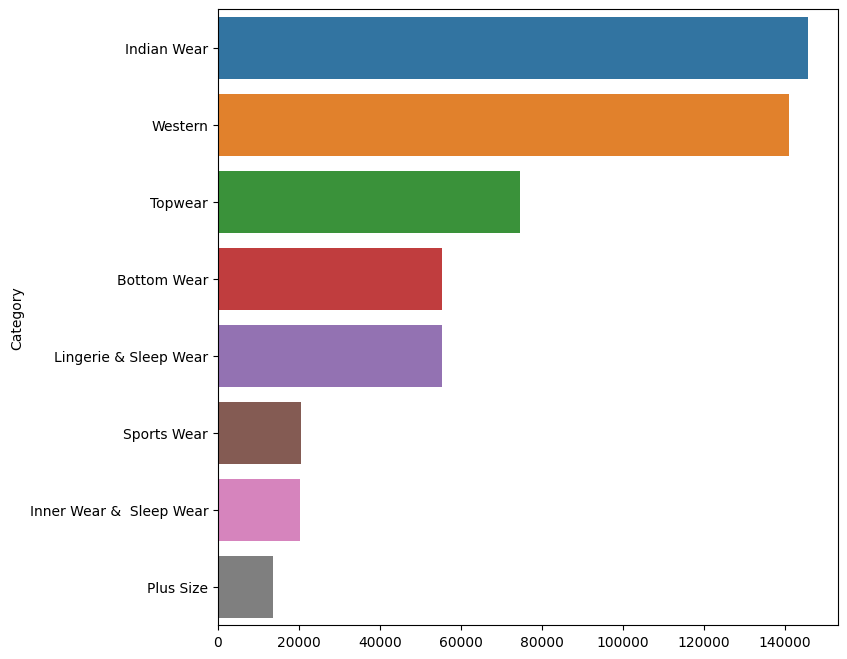

In [22]:
# TOP categorywise sales
plt.figure(figsize = (8,8))
sns.barplot(x = df['Category'].value_counts().head(8).values, y=df['Category'].value_counts().head(8).index)

<Axes: ylabel='Individual_category'>

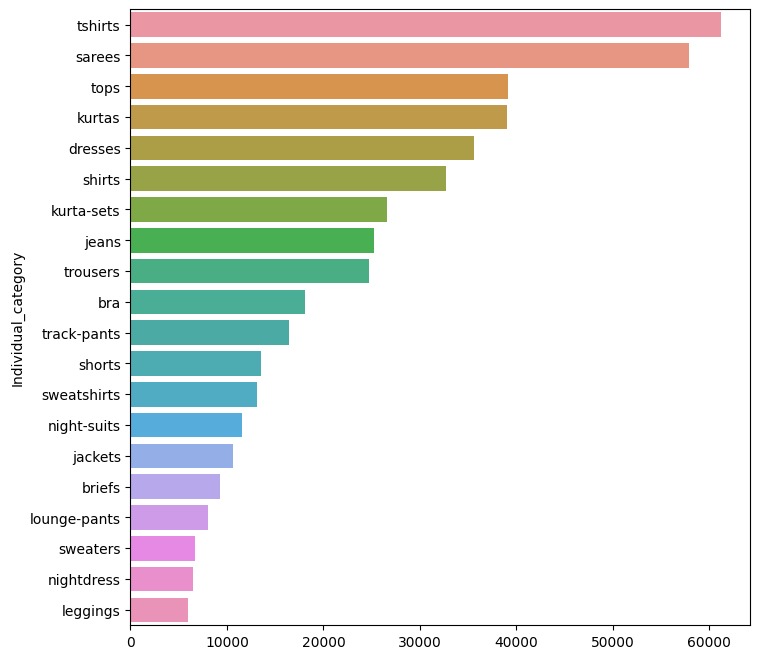

In [23]:
# TOP 10 INDIVIDULA CATEGORY
plt.figure(figsize = (8,8))
sns.barplot(x = df['Individual_category'].value_counts().head(20).values, y=df['Individual_category'].value_counts().head(20).index)

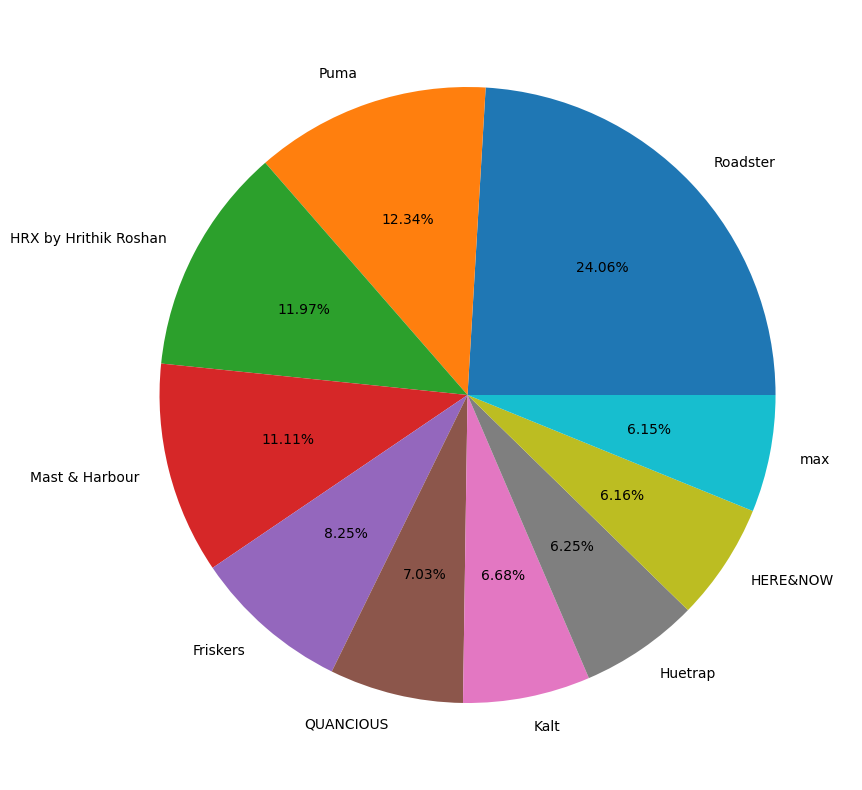

In [24]:
X = df[df['Individual_category'] == 'tshirts']
t = X['BrandName'].value_counts().head(10).values
r = X['BrandName'].value_counts().head(10).index

plt.figure(figsize = (15,10))
plt.pie(t[:10],labels=r[:10],autopct='%1.2f%%')
plt.show()

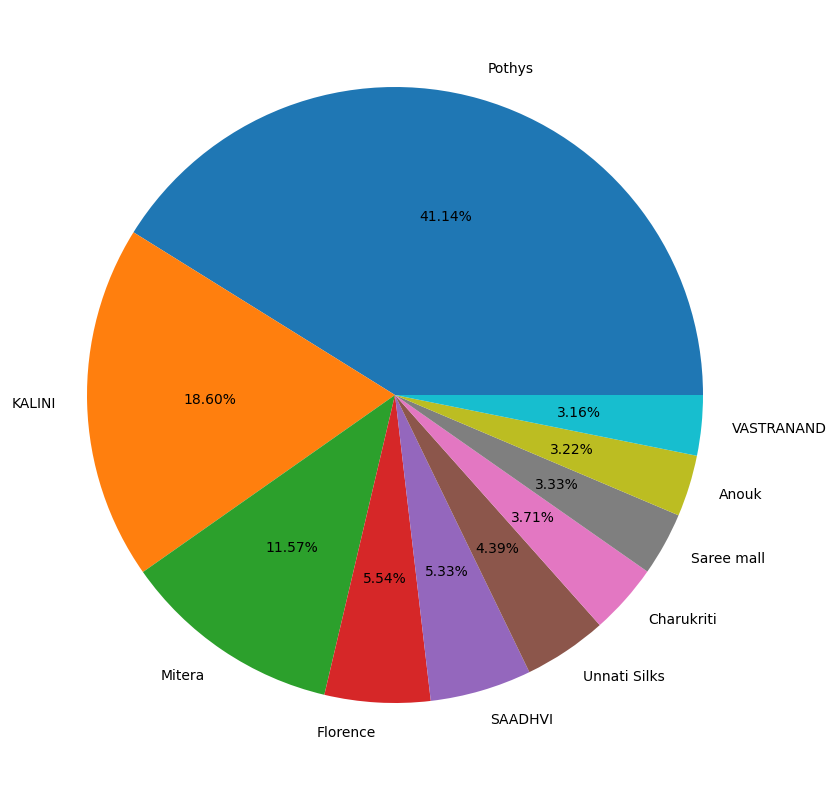

In [25]:
Y = df[df['Individual_category'] == 'sarees']
d  = Y['BrandName'].value_counts().head(10).values
g  = Y['BrandName'].value_counts().head(10).index

plt.figure(figsize = (15,10))

plt.pie(d[:15],labels=g[:15],autopct='%1.2f%%')
plt.show()

In [26]:
Z = df[df['Individual_category'] == 'tops']

In [27]:
df.groupby(['Category']).Individual_category.agg(['count']).reset_index()


,Category,count
0,Bottom Wear,55439
1,Indian Wear,145845
2,Inner Wear & Sleep Wear,20370
3,Lingerie & Sleep Wear,55258
4,Plus Size,13496
5,Sports Wear,20627
6,Topwear,74537
7,Western,140992


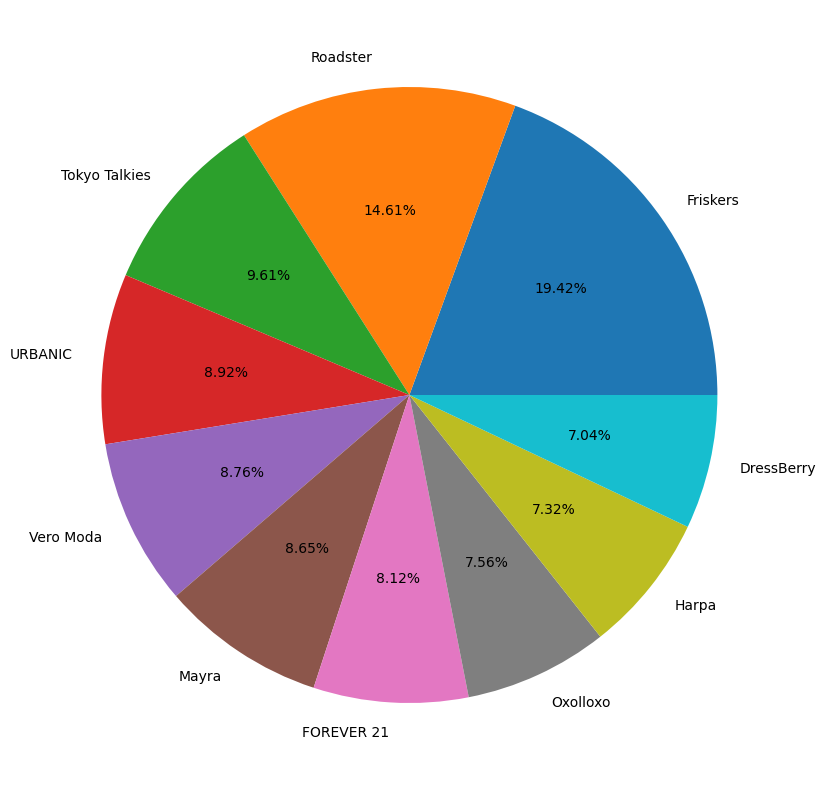

In [28]:
U  = Z['BrandName'].value_counts().head(10).values
T  = Z['BrandName'].value_counts().head(10).index

plt.figure(figsize = (15,10))
plt.pie(U[:15],labels=T[:15],autopct='%1.2f%%')
plt.show()

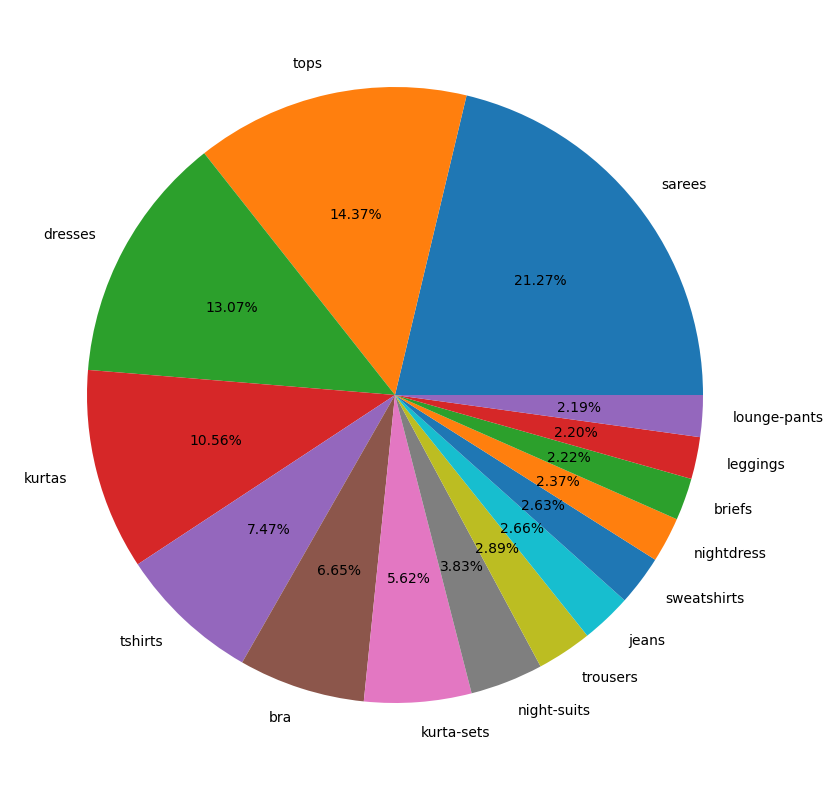

In [29]:
K = df[df['category_by_Gender'] == 'Women']
S = K['Individual_category'].value_counts().values
V = K['Individual_category'].value_counts().index

plt.figure(figsize = (15,10))
plt.pie(S[:15],labels=V[:15],autopct='%1.2f%%')
plt.show()

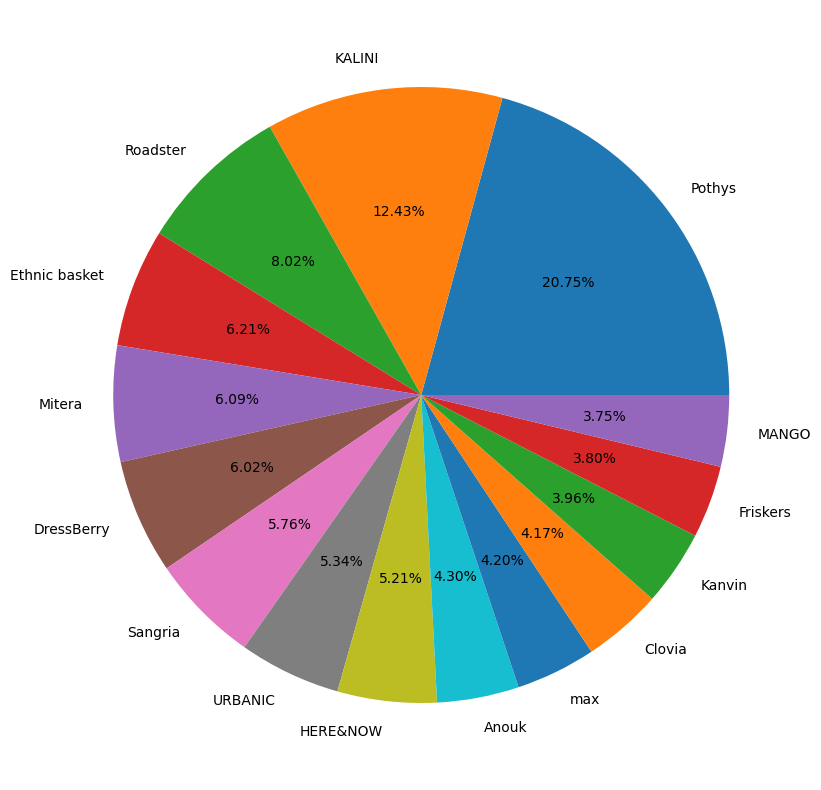

In [33]:
D= K['BrandName'].value_counts().values
W = K['BrandName'].value_counts().index

plt.figure(figsize = (15,10))

plt.pie(D[:15],labels=W[:15],autopct='%1.2f%%')
plt.show()

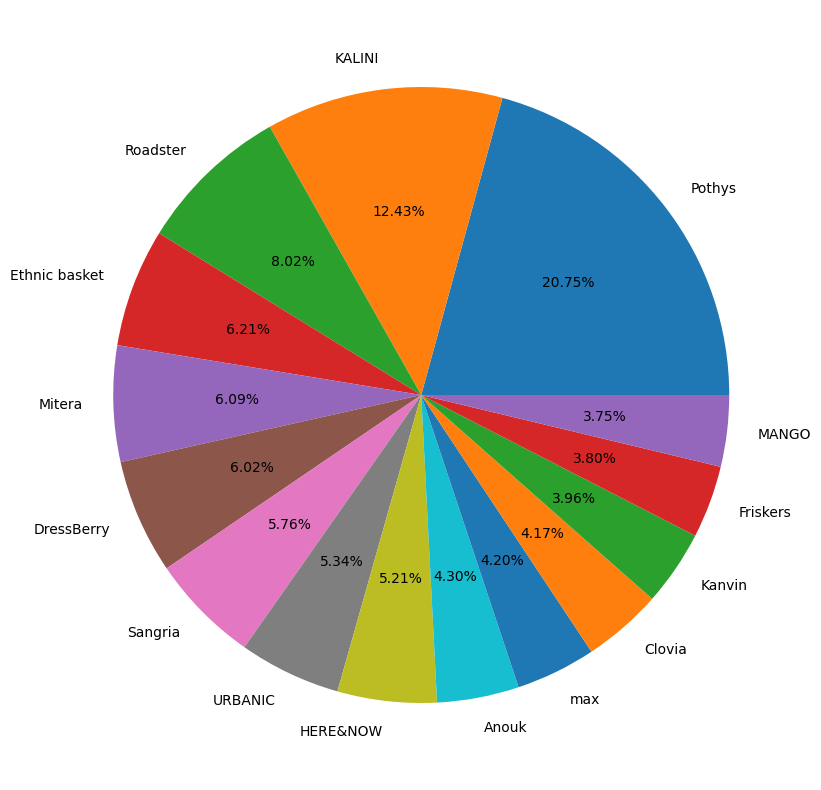

In [32]:
P = df[df['category_by_Gender'] == 'Men']

S= K['BrandName'].value_counts().values
T = K['BrandName'].value_counts().index
plt.figure(figsize = (15,10))

plt.pie(S[:15],labels=T[:15],autopct='%1.2f%%')
plt.show()